# Простая линейная регрессия
Простыми словами: линейная связь между двумя переменными - это связь в виде прямой линии. Простейший пример $y=x$. Например для координат **x=[1, 2, 3]** и **y=[1, 2, 3]**. Получим график вида:

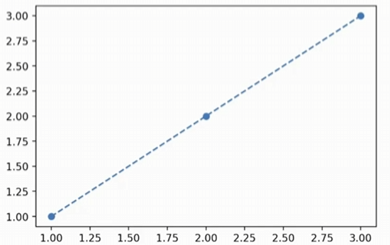

Так как через эти точки можно провести прямую линию, поэтому мы можем сделать гипотезу о том, что связь между этими переменными линейная. Так что мы можем взять любое значение *x*, например 1.5 и найти для него соответствующее значение *y*

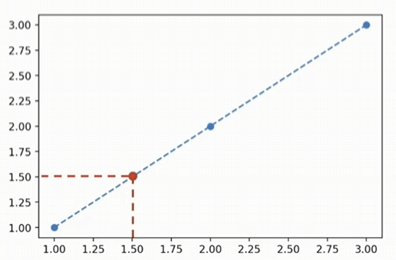

В реальной жизни точки обычно не ложатся на одну линию, все измерения выполняются с некоторой погрешностью, поэтому даже если связь действительно линейная, обычно, данные могут выглядеть следующим образом:

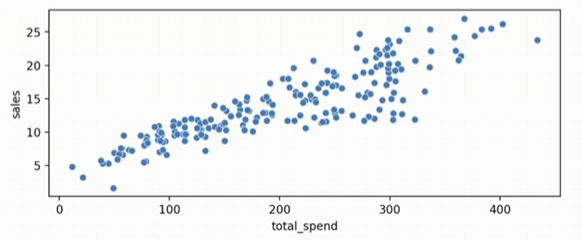

Возникает задача - *провести линию так, чтобы она наилучшим образом соответствовала этим точкам.* Такую линию можно провести разными способами. В таком случае - необходимо *минимизировать* общее расстояние между точками и линией. Проведя линию, можно измерить расстояния от точек до линии - это будут ошибки(остатки), которые необходимо минимизировать:

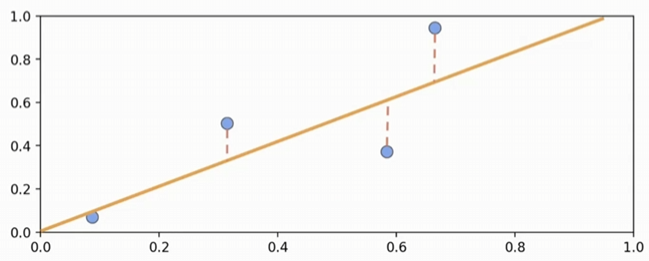

Остатки могут быть как положительными, так и отрицательными.

## Метод наименьших квадратов
Чтобы решить задачу минимизации остатков, перейдем к методу наименьших квадратов. Этот метод стремится минимизировать сумму квадратов разницы между наблюдаемым значением в наборе данных и значением, предсказанным линейной регрессией.  
Т.е. для примера на графике выше - мы должны взять все остатки, далее возвести их в квадрат и сложить эти квадраты. После этого нам необходимо найти такую линию, для которой сумма этих квадратов была бы минимальной.

Применение квадрата ошибок вместо самих ошибок поможет упростить вычисления, когда мы будем смотреть на производные.

Мы знаем уравнение для прямой линии:$$y=mx+b$$

* $m$ - это наклон линии (может быть положительным $m>0$, отрицательным $m<0$, нулевым $m=0$
* $b$ - это пересечение с осью $y$

В этом уравнении есть место только для одной переменной $x$. Метод наименьших квадратов поможет решить это уравнение - найти коэффициенты $m$ и $b$. 

**Рассмотрим на примере с продажей дома:**

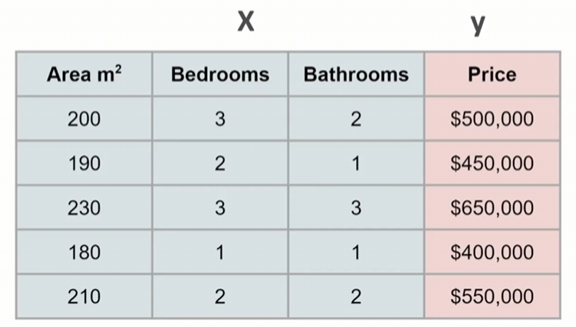

Здесь $X$ - это признаки(матрица размером 5 на 3), а $y$ - целевая переменная(вектор с пятью числами). Обозначим признаки как $x1, x2, x3$, а значения $x^1_1, x^2_1$ (для строк - верхний индекс, а для колонок - нижний) и т.д. 

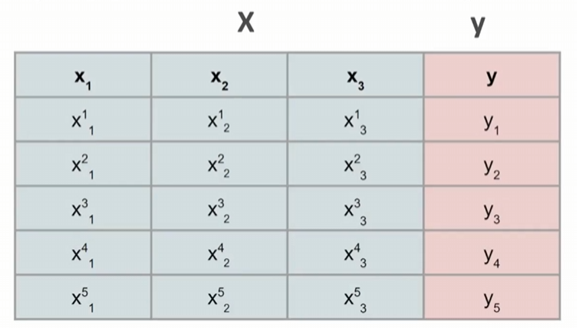

Поменяем порядок колонок местами:

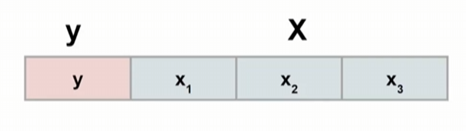

После этого для всех признаков добавим коэффициенты и получим общую формулу для линейной регрессии: $$ \hat{y} = \beta_0x_0 + ... + \beta_nx_n $$ или же $$\hat{y} = \sum_{i=0}^{n} \beta_i x_i$$

Здесь написан $\hat{y}$ - так как обычно нет таких коэффициентов бетта, чтобы точно воспроизвести $y$. Формула говорит следующее - если мы возьмем какие-то значения $x_i$, то после нахождения оптимальных коэффициентов $\beta_i$ мы сможем для любого $x$ вычислить значение целевой переменной $y$

По сути это то же самое, что и уравнение $y = mx + b$ для одного признака. Просто здесь несколько признаков.

В линейной регрессии, где мы пытаемся сформулировать связь между переменными, уравнение $$y = mx +b$$ превращается в уравнение $\hat{y} = b_0 + b_1x$

Здесь цель - предсказать значение зависимой переменной (y) на основе независимой переменной (x). Если решать относительно коэффициентов $b_0$ и $b_1$. То можно воспользоваться седующими формулами:
$$b_1 = \frac{\sum (x_i - \overline{x})(y_i - \overline{y})}{\sum (x_i - \overline{x})^2}$$
$$b_0 = \overline{y} - b_1\overline{x}$$

**Важно: формула для линейной регрессии подходит не для каждого набора данных**

### Ограничениея линейной регрессии
Квартет Энскомба показывает возможные недостатки регресии. Каждый из 4х графиков имеет одну и ту же линию регресии:

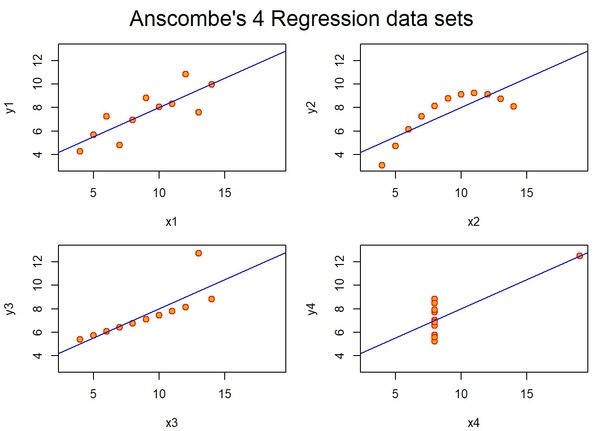

Линейная связь между двумя переменными наблюдается только в левом верхнем графике.

## Функция стоимости
Как найти коэффициенты $\beta$ в случае нескольких переменных $x$?

Остатки/ошибки для строки ***j*** вычисляются так:
$$y^j - \hat{y}^j$$
Это разница между истинным и оценочным значением 

Далее, поскольку мы хотим минимизировать квадраты ошибок, то возведем это выражение в квадрат:
$$(y^j - \hat{y}^j)^2$$

После этого суммируем все эти ошибки для ***m*** строк:
$$\sum_{j=1}^{m} (y^j - \hat{y}^j)^2$$

Если хотим найти среднее значение квадрата ошибок, то ещё нужно разделить на ***m***:
$$\frac{1}{m} \sum_{j=1}^{m} (y^j - \hat{y}^j)^2$$

В итоге мы получаем формулу для среднего значения квадарта ошибок.

**Функция стоимости(функция потерь)** измеряет "размер ошибки". Эту функцию мы хотим минимизировать
$$J(\beta) = \frac{1}{2m} \sum_{j=1}^{m} (y^j - \hat{y}^j)^2$$
Это функция от коэффициентов бетта. Мы выберем их так, чтобы минимизировать функцию. В скобках - ошибка(остаток) для строки $j$ - это разница между настоящим значением $y$ и прогнозируемым значением $\hat{y}$. Далее эта разница возводится в квадрат - квадрат ошибки всегда положителен - и для положительных, и для отрицательных ошибок. Далее суммируем это значение по всем строкам $m$ и делим на $m$ для усреднения. Также ещё делим на 2 - для удобства вычисления производных.

Итого мы получили функцию от коэффициентов $\beta$ и признаков $X$:
$$J(\beta) = \frac{1}{2m} \sum_{j=1}^{m} (y^j - \hat{y}^j)^2 = \frac{1}{2m} \sum_{j=1}^{m} (y^j - \sum_{i=0}^{n} \beta_i x^j_i)^2$$

Чтобы минимизировать функцию, нужно взять её производную и приравнять к нулю.

## Градиентный спуск
Задача состоит в том, чтобы найти коэффициенты $\beta$ минимизирующие функцию стоимости.

Формула для частных производных функции стоимости $J$ по отдельным коэффициентам $\beta$:

$$\frac{\partial J}{\partial \beta_k} = \frac{1}{m} \sum_{j=1}^{m} (y^i - \sum_{i=0}^{n} \beta_i x^j_i)(-x^j_k)$$

Все производные по отдельным бетта- можно собрать в единый вектор производных -  такой вектор с производными ещё называется градиентом. После этого, можно взять отдельные частные производные и подставить их в этот вектор:

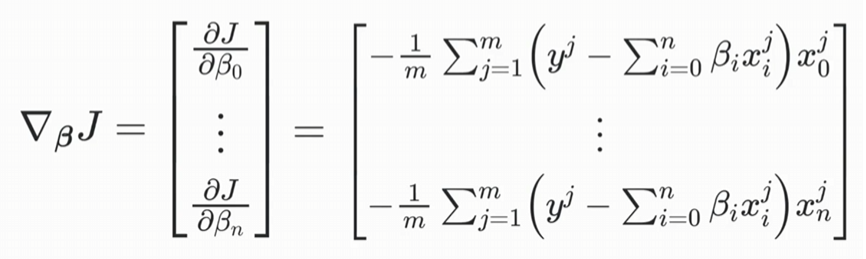

Также мы знаем как представить наши данные в векторном виде:

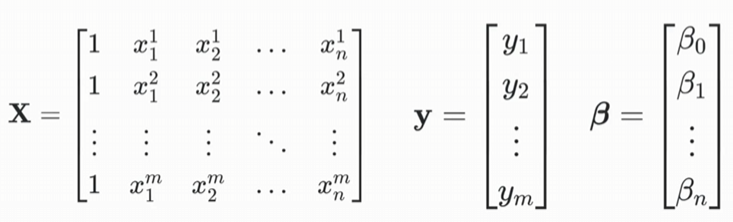

Матрица $X$ с признаками, вектор $y$ - с целевой переменной и вектор $\beta$ с коэффициентами $\beta$

С помощью этих обозначений можно разбить градиент на две части.  
Первая часть:

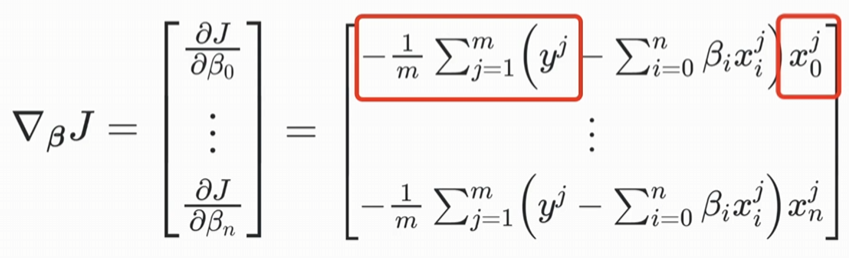

Вторая часть:

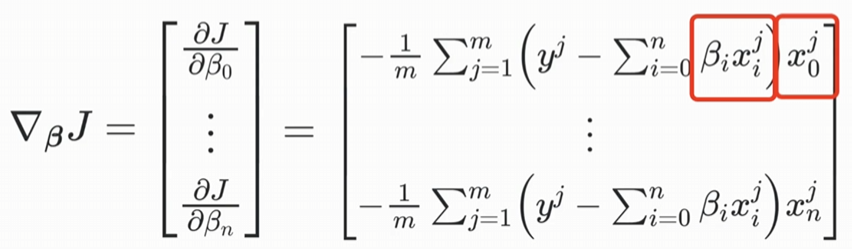

Если отделить эти части друг от друга, то можно получить вот такое выражение:

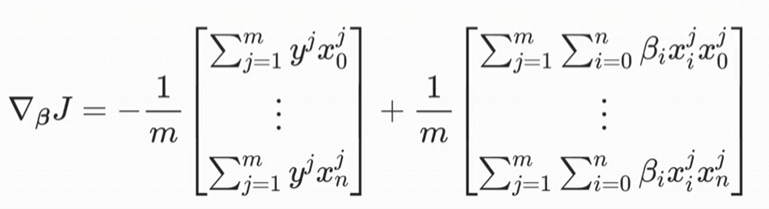

С его помощью можно вычислить производную для любого набора коэффициентов $\beta$, потому что они являются единственными неизвестными значениями в этом выражении.

Шаги пропорциональны отрицательному градиенту. Сначала шаги большие, затем они меньше.